In [7]:
import os
import sys
from collections import defaultdict

print(sys.version)

DATA_PATH = 'SRL_data/data/'
DEV_PATH = os.path.join(DATA_PATH, 'cpbdev.txt')
TRAIN_PATH = os.path.join(DATA_PATH, 'cpbtrain.txt')
TEST_PATH = os.path.join(DATA_PATH, 'cpbtest.txt')

3.6.3 (default, Oct  4 2017, 06:09:38) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]


In [44]:
paths = (TRAIN_PATH, DEV_PATH, TEST_PATH)
word_dict = defaultdict(int)
pos_dict = defaultdict(int)
label_dict = defaultdict(int)

sent_len = []

for path in paths:
    for lineno, line in enumerate(open(path, 'r', encoding='utf8')):
        tokens = line.strip().split()
        sent_len.append(len(tokens))
        for token in tokens:
            v = token.split('/')
            assert len(v) == 3 or len(v) ==2, 'wrong length of token at line:{}-{} {}'.format(path, lineno, line)
            word_dict[v[0]] += 1
            pos_dict[v[1]] += 1
            if len(v) == 3:
                label_dict[v[2]] += 1

In [43]:
import json

len(word_dict)
len(pos_dict)
len(label_dict)

json.dump(word_dict, open(os.path.join(DATA_PATH, 'word_dict.json'), 'w'))
json.dump(pos_dict, open(os.path.join(DATA_PATH, 'pos_dict.json'), 'w'))
json.dump(label_dict, open(os.path.join(DATA_PATH, 'label_dict.json'), 'w'))

18481

32

67

In [13]:
label_dict

defaultdict(int,
            {'B-ARG0': 6928,
             'B-ARG1': 10303,
             'B-ARG2': 1212,
             'B-ARG3': 179,
             'B-ARG4': 17,
             'B-ARGM-ADV': 1537,
             'B-ARGM-BNF': 99,
             'B-ARGM-CND': 108,
             'B-ARGM-DIR': 144,
             'B-ARGM-DIS': 5,
             'B-ARGM-EXT': 89,
             'B-ARGM-FRQ': 5,
             'B-ARGM-LOC': 1427,
             'B-ARGM-MNR': 846,
             'B-ARGM-PRP': 270,
             'B-ARGM-TMP': 2072,
             'B-ARGM-TPC': 92,
             'E-ARG0': 6928,
             'E-ARG1': 10303,
             'E-ARG2': 1212,
             'E-ARG3': 179,
             'E-ARG4': 17,
             'E-ARGM-ADV': 1537,
             'E-ARGM-BNF': 99,
             'E-ARGM-CND': 108,
             'E-ARGM-DIR': 144,
             'E-ARGM-DIS': 5,
             'E-ARGM-EXT': 89,
             'E-ARGM-FRQ': 5,
             'E-ARGM-LOC': 1427,
             'E-ARGM-MNR': 846,
             'E-ARGM-PRP': 270,
 

(array([ 11865.,   2744.,   1016.,    601.,    386.,    259.,    217.,
           145.,    146.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 9 Patch objects>)

(array([    0.,  2003.,  2201.,  1917.,  1629.,  1162.,  1034.,   736.,
         1183.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

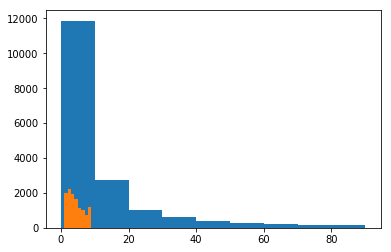

In [39]:
%matplotlib inline
from matplotlib import pyplot as plt

# sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
plt.hist(word_dict.values(), bins=list(range(0, 100, 10)))
plt.hist(word_dict.values(), bins=list(range(0, 10, 1)))

(array([  5799.,  10595.,   3422.,    798.,    205.,     75.,     47.,
            15.,      0.,     18.]),
 array([   0.,   24.,   48.,   72.,   96.,  120.,  144.,  168.,  192.,
         216.,  240.]),
 <a list of 10 Patch objects>)

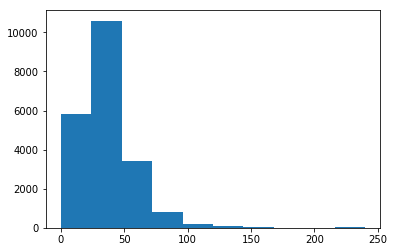

In [45]:
plt.hist(sent_len)